Use 311 dataLinks to an external site. or NYC Parks Monuments dataLinks to an external site.  from NYC Open Data

Use Open Refine or Pandas to clean your data.

Use Pandas to subset your data.

Write your new, subsetted data to a .csv or .json file and be sure that the data is properly readable after it is written.

Perform analysis on one or more variables in your subsetted data and use measures of skew and mean to provide better insight into what you have found.

Create at least three graphs of your analysis with proper labels, title, legends, etc. and save them as .png files.


Provide documentation including:

Descriptions of what any functions you write in your program do.

A list of dependencies needed to ensure that your code runs properly.

A link to the original data as well as a copy of your specific subset.

A process file in which you keep track of your activities in preparing and analyzing the data.

A rationale document in which you discuss the choices you made and why you made them. 

An analysis narrative document in which you explain your findings, what you think they mean, and why you think they are important.

Difficulties you encountered along the way.

Resources that were helpful in problem solving.

How you might improve or expand your work in the future.

In [38]:
#read in our data and preview its contents
#cleaned data from 311 service requests website
import pandas as pd
import matplotlib.pyplot as plt

big_data_filepath = '/content/311-Service-Requests-from-2010-to-Present-(1)_cleaned.csv'

service_df = pd.read_csv(big_data_filepath)

service_df.head()

<ipython-input-38-56c7c9df2200>:8: DtypeWarning: Columns (8,17,31) have mixed types. Specify dtype option on import or set low_memory=False.
  service_df = pd.read_csv(big_data_filepath)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41644437,02/06/2019 07:12:19 AM,02/10/2019 10:18:08 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,10031.0,618 WEST 136 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821047,-73.955260,"(40.82104731868181, -73.95526006866052)"
1,41644438,02/03/2019 05:50:34 PM,02/11/2019 04:10:38 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,10037.0,551 LENOX AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815935,-73.939534,"(40.81593496629473, -73.93953365624368)"
2,41644439,02/05/2019 11:15:00 AM,02/20/2019 10:21:40 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,11206.0,296 ELLERY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699366,-73.940498,"(40.69936615604876, -73.94049770940585)"
3,41644440,02/06/2019 09:40:25 AM,02/14/2019 02:08:41 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,11207.0,11 COOPER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683927,-73.911122,"(40.68392709946152, -73.91112237012467)"
4,41644441,02/02/2019 11:15:38 AM,02/12/2019 08:39:54 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10456.0,772 EAST 168 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.829231,-73.900753,"(40.82923097096116, -73.90075278192403)"


In [39]:
#get the 'shape' of our data (number of rows and columns)
service_df.shape

(209901, 41)

In [40]:
#get the names of the variables 
service_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [41]:
#get series data from a particular column
service_df.Agency

Output hidden; open in https://colab.research.google.com to view.

In [42]:
#get counts by species in ascending order using value_counts()
service_ascending = service_df.Agency.value_counts(ascending=True)
service_ascending

TAT          1
DCP          2
TAX         21
ACS         26
DOITT       38
EDC         38
DCAS        67
DOE         90
DHS        519
DFTA       591
HRA        738
DCA       1081
TLC       2242
DOHMH     3769
DOF       3806
DPR       4049
DEP      11815
DOT      19076
DOB      22775
DSNY     26969
NYPD     45104
HPD      67084
Name: Agency, dtype: int64

In [43]:
# GRAPH 1: Show the number of cases per borough
#get counts by species in ascending order using value_counts()
pd.options.display.max_rows = None
service_counts_ascending = service_df.Borough.value_counts(ascending=True)
service_counts_ascending

Unspecified       2611
STATEN ISLAND    10175
MANHATTAN        41529
BRONX            44856
QUEENS           46011
BROOKLYN         64683
Name: Borough, dtype: int64

In [44]:
#Perform analysis on one or more variables in the subsetted data and use measures of skew and mean
print(service_df.Borough.describe())

arr = service_df.Borough.value_counts(ascending=True).values
df = pd.DataFrame(arr)
print("Skew: ", df.skew().values[0])
print("Standard deviation: ", df.std().values[0])
print("Mean: ", df.mean().values[0])
print("Min: ", df.min().values[0])
print("Max: ", df.max().values[0])
print("25%: ", df.quantile(q=0.25).values[0])
print("50%: ", df.quantile(q=0.50).values[0])
print("75%: ", df.quantile(q=0.75).values[0])

count       209865
unique           6
top       BROOKLYN
freq         64683
Name: Borough, dtype: object
Skew:  -0.4591627797738369
Standard deviation:  23695.637132181106
Mean:  34977.5
Min:  2611
Max:  64683
25%:  18013.5
50%:  43192.5
75%:  45722.25


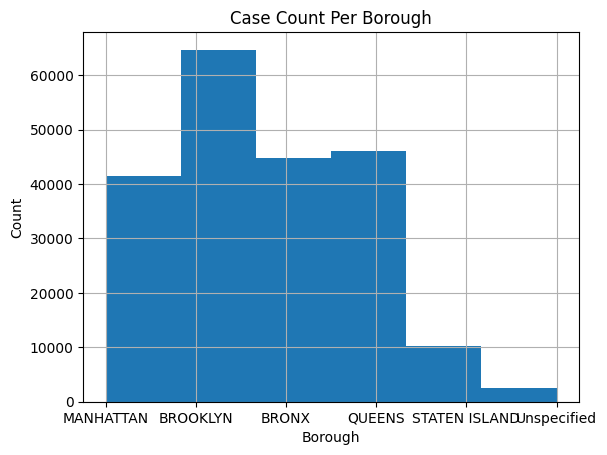

In [45]:
#service_df.Borough.hist()
ax = service_df.Borough.hist(bins=6)

ax.set_title('Case Count Per Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Count')

plt.savefig('graph1.png')

In [46]:
# GRAPH 2: Show average duration to solve complaint per agency
pd.options.display.max_rows = None
service_counts_ascending = service_df.Agency.value_counts(ascending=True)
service_counts_ascending

TAT          1
DCP          2
TAX         21
ACS         26
DOITT       38
EDC         38
DCAS        67
DOE         90
DHS        519
DFTA       591
HRA        738
DCA       1081
TLC       2242
DOHMH     3769
DOF       3806
DPR       4049
DEP      11815
DOT      19076
DOB      22775
DSNY     26969
NYPD     45104
HPD      67084
Name: Agency, dtype: int64

In [47]:
#Perform analysis on one or more variables in the subsetted data and use measures of skew and mean
print(service_df.Agency.describe())

arr = service_df.Agency.value_counts(ascending=True).values
df = pd.DataFrame(arr)
print("Skew: ", df.skew().values[0])
print("Standard deviation: ", df.std().values[0])
print("Mean: ", df.mean().values[0])
print("Min: ", df.min().values[0])
print("Max: ", df.max().values[0])
print("25%: ", df.quantile(q=0.25).values[0])
print("50%: ", df.quantile(q=0.50).values[0])
print("75%: ", df.quantile(q=0.75).values[0])


count     209901
unique        22
top          HPD
freq       67084
Name: Agency, dtype: object
Skew:  2.334533377769441
Standard deviation:  17367.119956091283
Mean:  9540.954545454546
Min:  1
Max:  67084
25%:  45.25
50%:  909.5
75%:  9873.5


In [48]:
#Use hour diff to find the amount of time it takes to complete one service request, then add the sum and subtract by value count to get mean
import numpy as np
import datetime

agencyList = service_df.Agency.value_counts().index
agencyDict = {}

count = 0 
for agency in agencyList:
  filtered = service_df[service_df['Agency'] == agency]
  try:
    for index, row in filtered.iterrows():
      #isolate case open and case close from data
      created_date = pd.to_datetime(row['Created Date'])
      closed_date = pd.to_datetime(row['Closed Date'])
      
      #first get hours elapsed
      hours_diff = pd.Timedelta(closed_date - created_date).seconds/3600.0
 
      #next convert hours to days
      days_diff = round(hours_diff*24, 2)

      #deal with potential nan values
      if str(days_diff) != 'nan':
        # populate dictionary with days elapsed
        if agencyDict.get(agency) is None:
          agencyDict[agency] = [days_diff, 1]
        else:
          agencyDict[agency] = [agencyDict[agency][0] + days_diff, agencyDict[agency][1] + 1]
        # agencyDict[agency] = days_diff
    
      else:
        pass

  except ValueError:
    continue

for key, value in agencyDict.items():
  agencyDict[key] = value[0] / value[1]

agencyDict


{'HPD': 300.7449610401262,
 'NYPD': 89.01760775097483,
 'DSNY': 228.99772774506394,
 'DOB': 220.34439121844224,
 'DOT': 231.74919909311393,
 'DEP': 204.1068125480817,
 'DPR': 258.0953574716171,
 'DOF': 291.08463741460866,
 'DOHMH': 148.56694080000008,
 'TLC': 296.6579819067498,
 'DCA': 283.7373450508788,
 'HRA': 0.405094850948509,
 'DFTA': 270.9083925549915,
 'DHS': 46.74901734104047,
 'DOE': 324.9068965517243,
 'EDC': 274.0905263157894,
 'DOITT': 344.9236842105263}

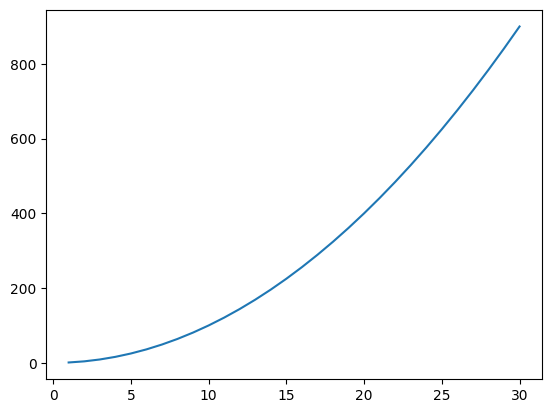

In [49]:
#Plotting
from matplotlib import pyplot as plt
base_number = range(1,31)
#use list comprehension to carry out exponentiation on each number during iteration
numbers_squared = [(number**2) for number in base_number]

plt.plot(base_number, numbers_squared)
plt.show()

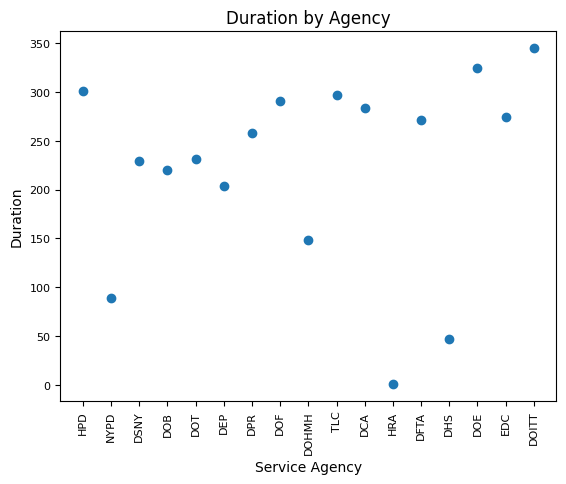

<Figure size 640x480 with 0 Axes>

In [50]:
#modify plot to make it more legible
from matplotlib import pyplot as plt_service

#x_vals = service_agency_names
x_vals = agencyDict.keys()
y_vals = agencyDict.values()

plt_service.scatter(x_vals, y_vals)
plt_service.title("Duration by Agency")
plt_service.xlabel("Service Agency")
plt_service.ylabel("Duration")
plt_service.xticks(rotation=90, size=8)
plt_service.yticks(size=8)
plt_service.show()

plt.savefig('graph2.png')

In [52]:
# GRAPH 3: Show the number of cases per Agency
#get counts by species in ascending order using value_counts()
pd.options.display.max_rows = None
service_counts_ascending = service_df.Agency.value_counts(ascending=True)
service_counts_ascending

TAT          1
DCP          2
TAX         21
ACS         26
DOITT       38
EDC         38
DCAS        67
DOE         90
DHS        519
DFTA       591
HRA        738
DCA       1081
TLC       2242
DOHMH     3769
DOF       3806
DPR       4049
DEP      11815
DOT      19076
DOB      22775
DSNY     26969
NYPD     45104
HPD      67084
Name: Agency, dtype: int64

In [53]:
#Perform analysis on one or more variables in the subsetted data and use measures of skew and mean
print(service_df.Agency.describe())

arr = service_df.Agency.value_counts(ascending=True).values
df = pd.DataFrame(arr)
print("Skew: ", df.skew().values[0])
print("Standard deviation: ", df.std().values[0])
print("Mean: ", df.mean().values[0])
print("Min: ", df.min().values[0])
print("Max: ", df.max().values[0])
print("25%: ", df.quantile(q=0.25).values[0])
print("50%: ", df.quantile(q=0.50).values[0])
print("75%: ", df.quantile(q=0.75).values[0])

count     209901
unique        22
top          HPD
freq       67084
Name: Agency, dtype: object
Skew:  2.334533377769441
Standard deviation:  17367.119956091283
Mean:  9540.954545454546
Min:  1
Max:  67084
25%:  45.25
50%:  909.5
75%:  9873.5


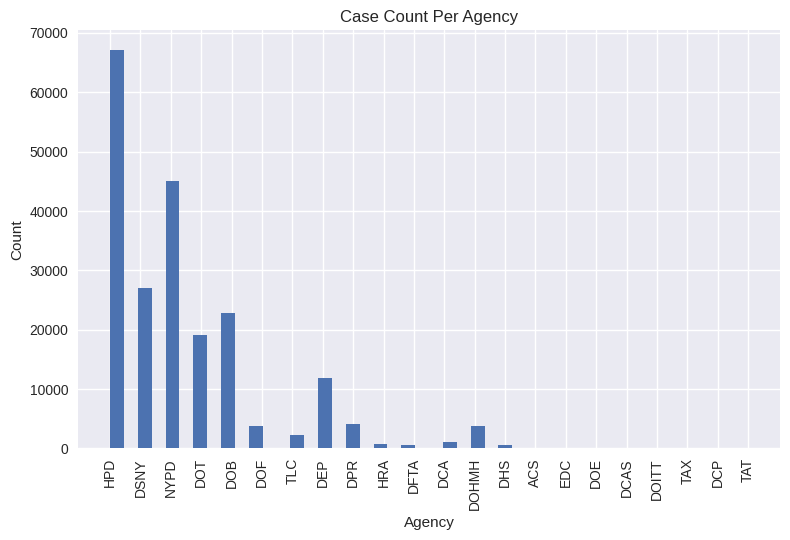

<Figure size 800x550 with 0 Axes>

In [63]:
#service_df.Descriptor.hist()
ax = service_df.Agency.hist(bins=46)
ax.set_title('Case Count Per Agency')
ax.set_xlabel('Agency')
ax.set_ylabel('Count')
plt.style.use('seaborn-v0_8')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig('graph3.png')


Documentation:

Link to original data: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 

Link to document and presentation: https://docs.google.com/presentation/d/1SNUQfIHIZCsRfH-NoNI3TKw0rPaEqF7OPh8Rf0tFI2c/edit?usp=sharing 